# Final graphs

In [1]:
import pickle
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as patches
from matplotlib.patches import Polygon, Rectangle
from helpers import bins_t_s, bins_y_s, set_size, get_color_overlap, get_size, set_size

In [2]:
# font stuff
from matplotlib import font_manager
sns.set_style("ticks")
from os.path import expanduser
fontpath = expanduser('/dlabdata1/LinLibertine_DRah.ttf')
prop = font_manager.FontProperties(fname=fontpath)

params = {
    "axes.titlesize" : 14,
    'axes.labelsize': 12,
    'font.size': 12,
    'legend.fontsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'font.family': prop.get_name(),
    'text.usetex': True,
}

mpl.rcParams.update(params)

## Number of comments

In [3]:
with open("../helper_files/comments_stats.pickle", "rb") as f:
    comments_yt = pickle.load(f)
with open("../helper_files/comments_stats-reddit.pickle", "rb") as f:
    comments_reddit = pickle.load(f)

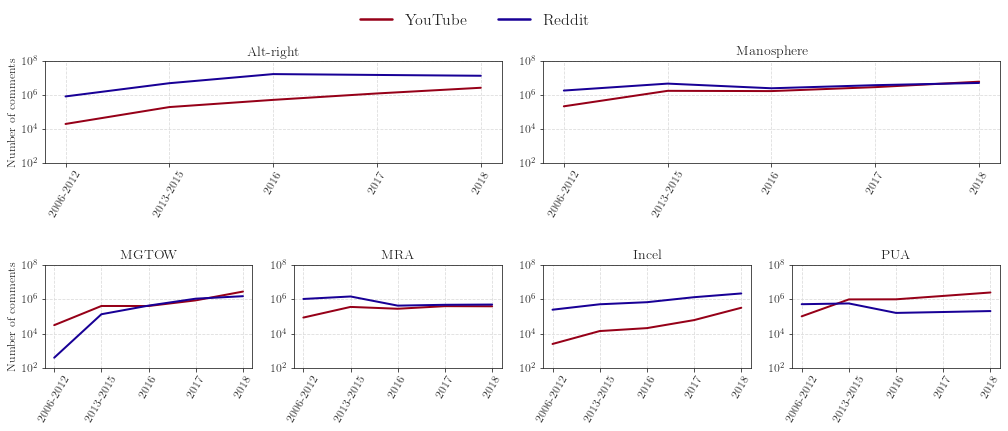

In [4]:
categories = [
    ['Alt-right', 'Manosphere'],
    ['MGTOW', 'MRA', 'Incel', 'PUA']
]


fig = plt.figure(
    constrained_layout=False,
    figsize=(14, 6),
)


gs = fig.add_gridspec(nrows=4, ncols=4, hspace=1)

axs = [
    [fig.add_subplot(gs[0, 0:2]),
    fig.add_subplot(gs[0, 2:4])],
    [fig.add_subplot(gs[1, 0]),
    fig.add_subplot(gs[1, 1]),
    fig.add_subplot(gs[1, 2]),
    fig.add_subplot(gs[1, 3])]
]


for idx, row in enumerate(categories):
    for idy, category in enumerate(row):
        ax = axs[idx][idy]
        
        yt = [comments_yt[b][category] for b in bins_y_s]
        sns.lineplot(x=bins_t_s,  y=yt, ax=ax, color="#960018", lw=2)
        
        
        if category not in ['Alt-lite', 'Intellectual Dark Web']:
            reddit = [comments_reddit[b][category] for b in bins_y_s]
            sns.lineplot(x=bins_t_s,  y=reddit, ax=ax, color="#180096", lw=2)
        
        ax.set_ylabel("")
        ax.set_xlabel("")
        ax.xaxis.grid(color="#DCDCDC", linestyle='dashed')
        ax.yaxis.grid(color="#DCDCDC", linestyle='dashed')
        ax.set(yscale="log")
        ax.set_ylim([1e2,1e8])
        ax.set_yticks([1e2, 1e4, 1e6, 1e8])
        
        ax.set_title(category, fontsize=14)

        if idy == 0:
            ax.set_ylabel("Number of comments")
            
#         ax.set_xticklabels(['2006\nto 2012', '2013\nto2015', '2016', '2017', '2018'])
            
        for tick in ax.get_xticklabels():
            tick.set_rotation(60)

custom_lines = [
    Line2D([0], [0], color="#960018", lw=2.5, ls="-"),
    Line2D([0], [0], color="#180096", lw=2.5, ls="-")
]

axs[0][1].legend(custom_lines, ["YouTube", "Reddit"], 
          loc="center", ncol=9, bbox_to_anchor=(-0.15, 1.4), frameon=False, fontsize=16)

set_size(fig, (14, 6))

fig.savefig(f"../imgs/global_overview.pdf", bbox_inches='tight')
fig.savefig(f"../imgs/global_overview.png", bbox_inches='tight')

## Similarity

In [5]:
with open("../helper_files/intersections.pickle", "rb") as f:
    df_inter_yt = pickle.load(f)
with open(f"../helper_files/intersections-reddit.pickle", "rb") as f:
    df_inter_reddit = pickle.load(f)
with open(f"../helper_files/intersections_control-reddit.pickle", "rb") as f:
    df_control = pickle.load(f)

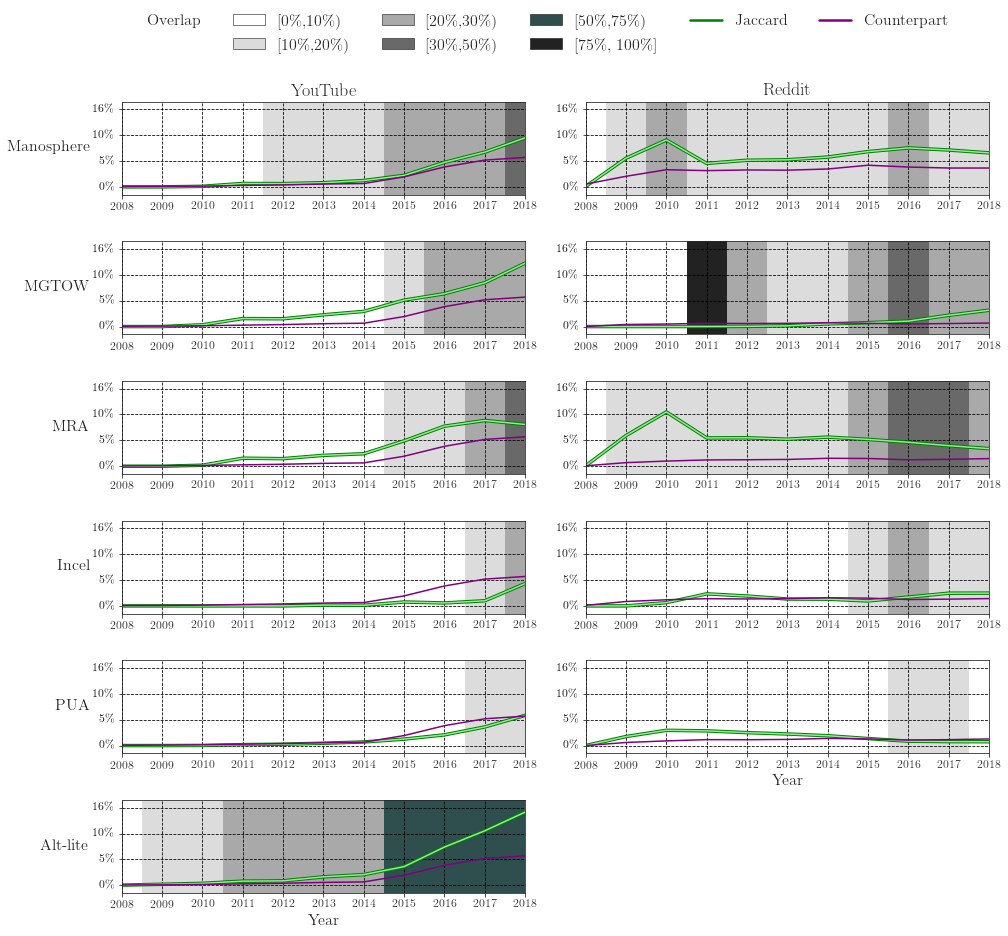

In [6]:
categories = ['Manosphere', 'MGTOW', 'MRA', 'Incel', 'PUA', 'Alt-lite']#, 'Intellectual Dark Web']
fig, axs = plt.subplots(len(categories), 2, figsize=(14, 13))
fig.subplots_adjust(wspace=0.15, hspace=0.5)

for idx, cat1 in enumerate(categories):

    row = ["Alt-right"]*2
    for idy, cat2 in enumerate(row):
        ax = axs[idx][idy]

        if idy == 0:
            df = df_inter_yt[(cat1, cat2)]
            dfc = df_inter_yt[("Control", cat2)]
            sns.lineplot(x="idx_str",  y="jaccard", data=df, ax=ax, color="green", lw=3.5)
            sns.lineplot(x="idx_str",  y="jaccard", data=df, ax=ax, color="lightgreen")
            sns.lineplot(x="idx_str",  y="jaccard", data=dfc, ax=ax, color="purple")
        elif cat1 not in ['Alt-lite', 'Intellectual Dark Web']:
            df = df_inter_reddit[(cat1, cat2)]
            dfc = df_control[cat2+cat1]
            sns.lineplot(x="idx_str",  y="jaccard", data=df, ax=ax, color="green", lw=3.5)
            sns.lineplot(x="idx_str",  y="jaccard", data=df, ax=ax, color="lightgreen")
            sns.lineplot(data=dfc, ax=ax, color="purple")
        else:
            fig.delaxes(ax)
            continue

            
        count = 0
        for _, row in df.iterrows():
            row = dict(row)
            if row["idx"][0] < 1209556800000:
                continue

            r = patches.Rectangle((count-0.5, -0.15), 1, 9, color=get_color_overlap(row['ocof']),  zorder=0)
            ax.add_patch(r)
            count += 1
        
        ax.set_ylabel("")
        ax.set_xlabel("")
        ax.set_xlim([0,10])
        ax.xaxis.grid(color="#000000", linestyle='dashed')
        ax.yaxis.grid(color="#000000", linestyle='dashed')
        ax.set_ylim([-0.015,0.165])
        ax.set_yticks([0, .05, 0.10, 0.15])
        ax.set_yticklabels(["0\%", "5\%", "10\%", "16\%"], color="black", va="center")
        

            
        if idx == len(categories)-1 or (idx == len(categories)-3 and idy >= 2):
            ax.set_xlabel("Year", fontsize=16)

        if idy == 0:
            ax.set_ylabel(cat1.replace("Intellectual Dark Web", "I.D.W."), fontsize=16, 
                          rotation=0, ha="right", va="center")
            
custom_lines = [
    patches.Rectangle((0,0),0.1,0.1,facecolor='#FFFFFF'),
    patches.Rectangle((0,0),0.1,0.1,facecolor='#FFFFFF'),
    patches.Rectangle((0,0),1,1,facecolor='#FFFFFF', edgecolor="#000000", lw=0.5),
    patches.Rectangle((0,0),1,1,facecolor='#DCDCDC', edgecolor="#000000", lw=0.5),
    patches.Rectangle((0,0),1,1,facecolor='#A9A9A9', edgecolor="#000000", lw=0.5),
    patches.Rectangle((0,0),1,1,facecolor='#696969', edgecolor="#000000", lw=0.5),
    patches.Rectangle((0,0),1,1,facecolor='#2F4F4F', edgecolor="#000000", lw=0.5),
    patches.Rectangle((0,0),1,1,facecolor='#222222', edgecolor="#000000", lw=0.5),
    Line2D([0], [0], color="green", lw=2.5, ls="-"),
    Line2D([0], [0], color="purple", lw=2.5, ls="-")
]

axs[0][0].legend(custom_lines, ['Overlap', "", '[0\%,10\\%)', '[10\%,20\\%)', '[20\%,30\%)',
                                '[30\%,50\%)', '[50\%,75\%)', '[75\%, 100\%]', "Jaccard", "Counterpart"], 
          loc="upper center", ncol=6, bbox_to_anchor=(1, 2.1), frameon=False, fontsize=16)

axs[4][1].set_xlabel("Year", fontsize=16)

axs[0][0].set_title("YouTube", fontsize=18)
axs[0][1].set_title("Reddit", fontsize=18)

set_size(fig, (14, 13))

fig.savefig(f"../imgs/global_similarity.pdf", bbox_inches='tight')
fig.savefig(f"../imgs/global_similarity.png", bbox_inches='tight')

## Migration

In [7]:
with open("../helper_files/global_user_df.pickle", "rb") as f:
    user_df_yt = pickle.load(f)
with open(f"../helper_files/global_user_df-reddit.pickle", "rb") as f:
    user_df_reddit = pickle.load(f)

In [8]:
user_df_reddit[user_df_reddit["constraint"] == "MRA"]

,mean,lower,upper,idxo,idx,start,p,numUsersStart,numUsersTracked,pUsersTracked,constraint,numUsersInfected,pUsersInfected
14,0.000000,0.000000,0.000000,0,"(1146398400000, 1367323200000)",0,"(1, 9999)",33998,33998,1.000000,MRA,0.0,0.000000
15,0.248660,0.239800,0.257521,1,"(1367323200000, 1462017600000)",0,"(1, 9999)",33998,9145,0.268986,MRA,2274.0,0.009392
16,0.529399,0.515063,0.543735,2,"(1462017600000, 1493553600000)",0,"(1, 9999)",33998,4660,0.137067,MRA,2467.0,0.005581
17,0.442718,0.425716,0.459720,3,"(1493553600000, 1525089600000)",0,"(1, 9999)",33998,3282,0.096535,MRA,1453.0,0.004222
18,0.397195,0.378757,0.415632,4,"(1525089600000, 1556625600000)",0,"(1, 9999)",33998,2709,0.079681,MRA,1076.0,0.003148
19,0.000000,0.000000,0.000000,1,"(1367323200000, 1462017600000)",1,"(1, 9999)",37087,37087,1.000000,MRA,0.0,0.000000
20,0.483341,0.471030,0.495652,2,"(1462017600000, 1493553600000)",1,"(1, 9999)",37087,6333,0.170761,MRA,3061.0,0.006925
21,0.432486,0.417154,0.447819,3,"(1493553600000, 1525089600000)",1,"(1, 9999)",37087,4014,0.108232,MRA,1736.0,0.005044
22,0.391682,0.374819,0.408546,4,"(1525089600000, 1556625600000)",1,"(1, 9999)",37087,3222,0.086877,MRA,1262.0,0.003693
23,0.000000,0.000000,0.000000,2,"(1462017600000, 1493553600000)",2,"(1, 9999)",13506,13506,1.000000,MRA,0.0,0.000000


In [ ]:
user_df_yt[user_df_yt["constraint"] == "Gaming"]

In [ ]:
constraints_names = [
    "Manosphere",
    "MGTOW", 
    "MRA",  
    "Incel", 
    "PUA",
#     "Control",
    "Alt-lite", 
]

constraints_names_reddit = [
    "Manosphere",
    "MGTOW", 
    "MRA",  
    "Incel", 
    "PUA",
#     "Gaming",
    ""
]

constraints = [
    lambda x: x["MGTOW"] + x["Incel"] + x["MRA"] + x["PUA"] != 0 and
              x["MGTOW"] + x["Incel"] + x["MRA"] + x["PUA"] + x["Intellectual Dark Web"] + x["Alt-lite"] == 1,
    lambda x: x["MGTOW"] != 0 and x["MGTOW"] + x["Intellectual Dark Web"] + x["Alt-lite"]== 1,
    lambda x: x["MRA"] != 0 and x["MRA"] + x["Intellectual Dark Web"] + x["Alt-lite"] == 1,
    lambda x: x["Incel"] != 0 and x["Incel"] + x["Intellectual Dark Web"] + x["Alt-lite"] == 1,
    lambda x: x["PUA"] != 0 and x["PUA"] + x["Intellectual Dark Web"] + x["Alt-lite"] == 1,
#     lambda x: x["Control"] != 0 and x["Control"] + x["Intellectual Dark Web"] + x["Alt-lite"] == 1,
    lambda x: x["Alt-lite"] == 1,
]

df = user_df_yt
df2 = user_df_reddit

fig = plt.figure(
    constrained_layout=False,
    figsize=(14, 13),
)


gs = fig.add_gridspec(nrows=len(constraints), ncols=10, wspace=0.325, hspace=0.3, top=0.90)
d_val = {
    (1,9999): "#960018",
}
d_val_reddit = {
    (1,9999): "#180096",
}
axs = []

for i in range(len(constraints)):
    first = fig.add_subplot(gs[i, 0:4])
    axs.append(first)
    axs.append(fig.add_subplot(gs[i, 4:7]))
    axs.append(fig.add_subplot(gs[i, 7:9]))
    axs.append(fig.add_subplot(gs[i, 9]))
    

for idx, (constraint, constraint_reddit) in enumerate(zip(constraints_names, constraints_names_reddit)):
    for start in range(4):
        idy = start
        ax = axs[idy + idx*4]
        df_tmp = df[(df.constraint == constraint) & (df.start == start)]
        df_tmp_control = df[(df.constraint == "Control") & (df.start == start)]
        df_tmp2 = df2[(df2.constraint == constraint_reddit) & (df2.start == start)]
        df_tmp2_control = df2[(df2.constraint == "Gaming") & (df2.start == start)]

        for k, idhue in d_val.items():
            df_tmp_ = df_tmp[df_tmp.p == k]
            ax.errorbar(df_tmp_["idxo"], df_tmp_["mean"],
                        df_tmp_["mean"]-df_tmp_["lower"], df_tmp_["upper"]-df_tmp_["mean"], color=idhue)
            
            df_tmp_ = df_tmp_control[df_tmp_control.p == k]
            ax.errorbar(df_tmp_["idxo"], df_tmp_["mean"],
                        df_tmp_["mean"]-df_tmp_["lower"], df_tmp_["upper"]-df_tmp_["mean"],
                        color=idhue, ls=":", alpha=0.5)
        
        if constraint_reddit:
            for k, idhue in d_val_reddit.items():
                df_tmp_ = df_tmp2[df_tmp2.p == k]
                ax.errorbar(df_tmp_["idxo"], df_tmp_["mean"],
                            df_tmp_["mean"]-df_tmp_["lower"], df_tmp_["upper"]-df_tmp_["mean"], color=idhue)
            
                        
                df_tmp_ = df_tmp2_control[df_tmp2_control.p == k]
                ax.errorbar(df_tmp_["idxo"], df_tmp_["mean"],
                            df_tmp_["mean"]-df_tmp_["lower"], df_tmp_["upper"]-df_tmp_["mean"],
                            color=idhue, ls=":", alpha=0.5)

            
        ax.xaxis.grid(color="#DCDCDC", linestyle='dashed')
        ax.yaxis.grid(color="#DCDCDC", linestyle='dashed')
        ax.set_xticks([i for i in range(start, 5)])
        ax.set_ylim([-0.05,0.55])
        ax.set_yticks([0, 0.17, .34, .51])
        

        if idy == 0:
            ax.set_ylabel(constraint.replace("Control", "Counterparts"), 
                          fontsize=16, rotation=0, ha="right", va="center")
            if constraint == "Alt-lite or I.D.W.":
                ax.set_ylabel("Alt-lite\nor I.D.W.", fontsize=14, rotation=0, ha="right", va="center")
            ax.set_yticklabels(["0\%", "17\%", "34\%", "51\%"])

        else:
            ax.set_ylabel("")            
            ax.set_yticklabels([])

        if idx == 0:
            ax.set_title("Start: {}".format(bins_t_s[idy], fontsize=18))
            
        if idx == len(constraints_names)-1:
            ax.set_xticklabels([bins_t_s[i] for i in range(start, 5)])
        else:
            ax.set_xticklabels([bins_t_s[i] for i in range(start, 5)])
            
            
custom_lines = [
    Line2D([0], [0], color="#960018", lw=2.5),
    Line2D([0], [0], color="#960018", lw=2.5, ls=":", alpha=0.5),
    Line2D([0], [0], color="#180096", lw=2.5),
    Line2D([0], [0], color="#180096", lw=2.5, ls=":", alpha=0.5)

]

axs[1].legend(custom_lines, ['YouTube', "YouTube Counterpart", 'Reddit', "Reddit Counterpart"], 
          loc="center", ncol=4,bbox_to_anchor=(0.35, 1.5), frameon=False, fontsize=16)

set_size(fig, (14, 11))

fig.savefig(f"../imgs/global_user_traj.pdf", bbox_inches='tight')
fig.savefig(f"../imgs/global_user_traj.png", bbox_inches='tight')

,mean,lower,upper,idxo,idx,start,p,numUsersStart,numUsersTracked,pUsersTracked,constraint,numUsersInfected,pUsersInfected


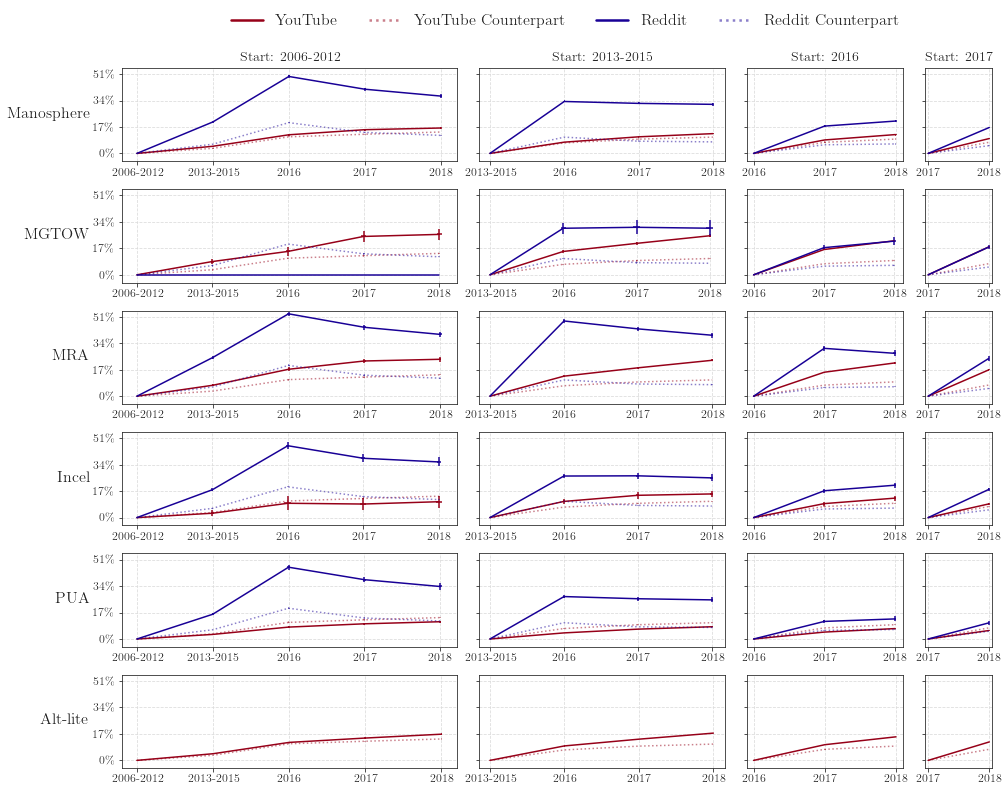

In [10]:
constraints_names = [
    "Manosphere",
    "MGTOW", 
    "MRA",  
    "Incel", 
    "PUA",
#     "Control",
    "Alt-lite", 
]

constraints_names_reddit = [
    "Manosphere",
    "MGTOW", 
    "MRA",  
    "Incel", 
    "PUA",
#     "Gaming",
    ""
]

constraints = [
    lambda x: x["MGTOW"] + x["Incel"] + x["MRA"] + x["PUA"] != 0 and
              x["MGTOW"] + x["Incel"] + x["MRA"] + x["PUA"] + x["Intellectual Dark Web"] + x["Alt-lite"] == 1,
    lambda x: x["MGTOW"] != 0 and x["MGTOW"] + x["Intellectual Dark Web"] + x["Alt-lite"]== 1,
    lambda x: x["MRA"] != 0 and x["MRA"] + x["Intellectual Dark Web"] + x["Alt-lite"] == 1,
    lambda x: x["Incel"] != 0 and x["Incel"] + x["Intellectual Dark Web"] + x["Alt-lite"] == 1,
    lambda x: x["PUA"] != 0 and x["PUA"] + x["Intellectual Dark Web"] + x["Alt-lite"] == 1,
#     lambda x: x["Control"] != 0 and x["Control"] + x["Intellectual Dark Web"] + x["Alt-lite"] == 1,
    lambda x: x["Alt-lite"] == 1,
]

df = user_df_yt
df2 = user_df_reddit

fig = plt.figure(
    constrained_layout=False,
    figsize=(14, 13),
)


gs = fig.add_gridspec(nrows=len(constraints), ncols=10, wspace=0.325, hspace=0.3, top=0.90)
d_val = {
    (1,9999): "#960018",
}
d_val_reddit = {
    (1,9999): "#180096",
}
axs = []

for i in range(len(constraints)):
    first = fig.add_subplot(gs[i, 0:4])
    axs.append(first)
    axs.append(fig.add_subplot(gs[i, 4:7]))
    axs.append(fig.add_subplot(gs[i, 7:9]))
    axs.append(fig.add_subplot(gs[i, 9]))
    

for idx, (constraint, constraint_reddit) in enumerate(zip(constraints_names, constraints_names_reddit)):
    for start in range(4):
        idy = start
        ax = axs[idy + idx*4]
        df_tmp = df[(df.constraint == constraint) & (df.start == start)]
        df_tmp_control = df[(df.constraint == "Control") & (df.start == start)]
        df_tmp2 = df2[(df2.constraint == constraint_reddit) & (df2.start == start)]
        df_tmp2_control = df2[(df2.constraint == "Gaming") & (df2.start == start)]

        for k, idhue in d_val.items():
            df_tmp_ = df_tmp[df_tmp.p == k]
            ax.errorbar(df_tmp_["idxo"], df_tmp_["mean"],
                        df_tmp_["mean"]-df_tmp_["lower"], df_tmp_["upper"]-df_tmp_["mean"], color=idhue)
            
            df_tmp_ = df_tmp_control[df_tmp_control.p == k]
            ax.errorbar(df_tmp_["idxo"], df_tmp_["mean"],
                        df_tmp_["mean"]-df_tmp_["lower"], df_tmp_["upper"]-df_tmp_["mean"],
                        color=idhue, ls=":", alpha=0.5)
        
        if constraint_reddit:
            for k, idhue in d_val_reddit.items():
                df_tmp_ = df_tmp2[df_tmp2.p == k]
                ax.errorbar(df_tmp_["idxo"], df_tmp_["mean"],
                            df_tmp_["mean"]-df_tmp_["lower"], df_tmp_["upper"]-df_tmp_["mean"], color=idhue)
            
                        
                df_tmp_ = df_tmp2_control[df_tmp2_control.p == k]
                ax.errorbar(df_tmp_["idxo"], df_tmp_["mean"],
                            df_tmp_["mean"]-df_tmp_["lower"], df_tmp_["upper"]-df_tmp_["mean"],
                            color=idhue, ls=":", alpha=0.5)

            
        ax.xaxis.grid(color="#DCDCDC", linestyle='dashed')
        ax.yaxis.grid(color="#DCDCDC", linestyle='dashed')
        ax.set_xticks([i for i in range(start, 5)])
        ax.set_ylim([-0.05,0.55])
        ax.set_yticks([0, 0.17, .34, .51])
        

        if idy == 0:
            ax.set_ylabel(constraint.replace("Control", "Counterparts"), 
                          fontsize=16, rotation=0, ha="right", va="center")
            if constraint == "Alt-lite or I.D.W.":
                ax.set_ylabel("Alt-lite\nor I.D.W.", fontsize=14, rotation=0, ha="right", va="center")
            ax.set_yticklabels(["0\%", "17\%", "34\%", "51\%"])

        else:
            ax.set_ylabel("")            
            ax.set_yticklabels([])

        if idx == 0:
            ax.set_title("Start: {}".format(bins_t_s[idy], fontsize=18))
            
        if idx == len(constraints_names)-1:
            ax.set_xticklabels([bins_t_s[i] for i in range(start, 5)])
        else:
            ax.set_xticklabels([bins_t_s[i] for i in range(start, 5)])
            
            
custom_lines = [
    Line2D([0], [0], color="#960018", lw=2.5),
    Line2D([0], [0], color="#960018", lw=2.5, ls=":", alpha=0.5),
    Line2D([0], [0], color="#180096", lw=2.5),
    Line2D([0], [0], color="#180096", lw=2.5, ls=":", alpha=0.5)

]

axs[1].legend(custom_lines, ['YouTube', "YouTube Counterpart", 'Reddit', "Reddit Counterpart"], 
          loc="center", ncol=4,bbox_to_anchor=(0.35, 1.5), frameon=False, fontsize=16)

set_size(fig, (14, 11))

fig.savefig(f"../imgs/global_user_traj.pdf", bbox_inches='tight')
fig.savefig(f"../imgs/global_user_traj.png", bbox_inches='tight')